# The Motion Estimator

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

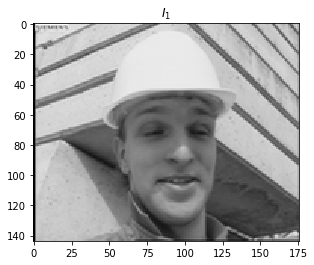

In [4]:
I1 = mpimg.imread(r'D:\IITH Courses\sem5\Image Processing\Assignment-4\first_frame.png')
plt.imshow(I1,cmap = "gray")
plt.title("$I_{1}$")
plt.show()


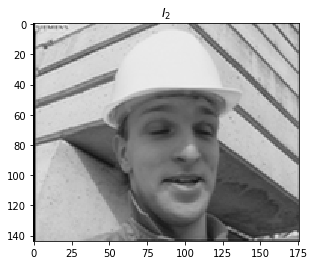

In [5]:
I2 = mpimg.imread(r'D:\IITH Courses\sem5\Image Processing\Assignment-4\second_frame.png')
plt.imshow(I2,cmap = "gray")
plt.title("$I_{2}$")
plt.show()

### 1. Finding the motion vectors

In [6]:
def block_steps(a,i,j):
    l = []
    for u in [-a,0,a]:
        for v in [-a,0,a]:
            if v+i >=0 and u+j >= 0:
                t = [v+i,u+j]
                l.append(t)
    return l

def generate_pix(I,i,j):
    temp = [[0 for _ in range(16)] for _ in range(16)]
    if (i+16 < I.shape[0]) and (j+16 < I.shape[1]):
        for p in range(i,i+16):
            for q in range(j,j+16):
                temp[p-i][q-j] = I[p][q]
        return temp,True
    else:
        return temp,False
        

In [7]:
# notations
# blocki - contains the list of available pixels for a particular step and macroblock  
# arr_pix i - list of 16*16 pixels of each value of block i
# dis i - possible distance array
# ind i - contains index with best match
# p_i,q_i - final pixels d1 d2
def Motion_estimation_Util(I1,I2):
    N = len(I1)
    M = len(I1[0])
    Pairs = []
    for i in range(0,N,16):
        for j in range(0,M,16):
            
            # step1
            block1 = block_steps(4,i,j)
            arr_pix1 = []
            for pair in block1:
                temp,flag = generate_pix(I1,pair[0],pair[1])
                if flag:
                    arr_pix1.append(temp)
                else:
                    arr_pix1.append(-1)
            dis1 = []
            for arr in arr_pix1:
                t = 0
                if arr != -1:
                    for p in range(i,i+16):
                        for q in range(j,j+16):
                            t += abs(I2[p][q]-arr[p-i][q-j])
                    dis1.append(t)
                else:
                    dis1.append(10**5)
 
                    

            ind1 = 0
            min_val1 = dis1[0]
            for k in range(1,len(dis1)):
                if min_val1 > dis1[k]:
                    min_val1 = dis1[k]
                    ind1 = k
            p1,q1 = block1[ind1][0],block1[ind1][1]
            
            # step 2
            block2 = block_steps(2,p1,q1)
            arr_pix2 = []
            for pair in block2:
                temp,flag = generate_pix(I1,pair[0],pair[1])
                if flag:
                    arr_pix2.append(temp)
                else:
                    arr_pix2.append(-1)
            dis2 = []
            for arr in arr_pix2:
                t = 0
                if arr != -1:
                    for p in range(i,i+16):
                        for q in range(j,j+16):
                            t += abs(I2[p][q]-arr[p-i][q-j])
                    dis2.append(t)
                else:
                    dis2.append(10**5)
                    

            ind2 = 0
            min_val2 = dis2[0]
            for k in range(1,len(dis2)):
                if min_val2 > dis2[k]:
                    min_val2 = dis2[k]
                    ind2 = k
            p2,q2 = block2[ind2][0],block2[ind2][1]
            
            
            # step 3
            block3 = block_steps(1,p2,q2)
            arr_pix3 = []
            for pair in block3:
                temp,flag = generate_pix(I1,pair[0],pair[1])
                if flag:
                    arr_pix3.append(temp)
                else:
                    arr_pix3.append(-1)
            dis3 = []
            for arr in arr_pix3:
                t = 0
                if arr != -1:
                    for p in range(i,i+16):
                        for q in range(j,j+16):
                            t += abs(I2[p][q]-arr[p-i][q-j])
                    dis3.append(t)
                else:
                    dis3.append(10**5)
                    

            ind3 = 0
            min_val3 = dis3[0]
            for k in range(1,len(dis3)):
                if min_val3 > dis3[k]:
                    min_val3 = dis3[k]
                    ind3 = k
            p3,q3 = block3[ind3][0],block3[ind3][1]         
            
            Pairs.append([p3-i,q3-j])
            
    return Pairs
            
 

In [8]:
r = Motion_estimation_Util(I2,I1)
print(r)

[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [4, 4], [7, -6], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [-4, 0], [3, 2], [1, 2], [0, 0], [0, 0], [-3, -2], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [-1, -3], [-1, 5], [-1, 1], [0, 0], [0, 0], [-1, -1], [0, 0], [0, 0], [0, 0], [0, 0], [-1, 3], [-1, 5], [0, 4], [-1, 2], [0, 0], [0, 0], [-1, -1], [0, 0], [0, 0], [0, 0], [0, 1], [-1, 4], [-1, 4], [0, 4], [1, 2], [0, 0], [-2, -2], [-2, -2], [0, 0], [0, 0], [-1, -1], [-1, 0], [-1, 4], [-1, 5], [-1, 5], [1, 2], [-1, -1], [0, 0], [-2, -2], [0, 0], [0, 0], [0, 0], [-1, 0], [0, 4], [0, 4], [0, 4], [-1, 2], [0, 0], [0, 0], [-1, -1], [0, 0], [0, 0], [0, 0], [0, 0], [-1, 0], [0, 4], [0, 4], [0, 2], [0, 0], [0, 0], [-1, -1], [-1, 0], [-1, -1], [-1, 1], [-1, 0], [-1, -1], [-2, -1], [-1, 2], [-1, 0], [-5, 5], [-2, 7], [-1, -1]]


### 2.Plotting motion vectors

In [9]:
def plot(pairs,I2):
    N = len(I2)
    M = len(I2[0])
    plt.imshow(I2,cmap = "gray") 
    k = 0
    for i in range(0,N,16):
        for j in range(0,M,16):
            plt.arrow(i,j,pairs[k][0],pairs[k][1])
            k += 1
    plt.title("motion vectors plot")
    plt.show()

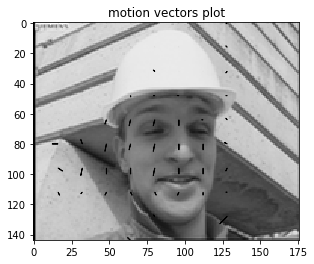

In [10]:
plot(r,I1)

### 3.Generating the motion compensated predicted frame using the motion vectors and the first frame.

In [35]:
def gen_img(pairs,I2):
    N = len(I2)
    M = len(I2[0])
    temp = [[0 for _ in range(M)] for _ in range(N)]
            
    t = 0
    for i in range(0,N,16):
        for j in range(0,M,16):
            for u in range(0,16):
                for v in range(0,16):
                    if i < N-pairs[t][0]-u and j < M-pairs[t][1]-v and i+pairs[t][0]>=0 and j+pairs[t][1]>=0:
                        temp[i+u][j+v] = I2[i+pairs[t][0]+u][j+pairs[t][1]+v]
            t += 1
                            
    return temp
    
        

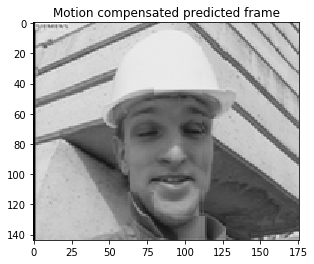

In [36]:
plt.imshow(gen_img(r,I1),cmap = "gray")
plt.title("Motion compensated predicted frame")
plt.show()

### 4.The error between the second frame and its motion compensated predicted version

In [38]:
def cal_error_MAD(J,I1):
    N = len(I1)
    M = len(I1[0])
    diff = 0
    for i in range(N):
        for j in range(M):
            t1 = int(J[i][j]*255)
            t2 = int(I1[i][j]*255)
            diff += abs(t1-t2)
    diff = (diff)/(M*N)
    print(diff)
    
cal_error_MAD(gen_img(r,I1),I2)

8.2109375


#### Note : Here I have taken $I_{1}$ and generated the motion compensated version of $I_{2}$ using $I_{1}$ for the demonstration